# Hypothesis testing: click or not-click A/B test

In this simulated experiment, we try to discover if a modification in our company's advertisement can lead to an increase on its click-rate. We want to get an idea of how our new ad can increase the user's interest, and therefore increase the number of clicks.

To this reason, we simulate an ***A/B test*** in which 500 users are directed to the old ad (control group) and 500 users are directed to the new ad (test group). The test group will have a 48% click rate increase. We want to determine statistically whether that difference is due to chance or is statistically significant.

## Experiment pipeline
**1. Create data:** we randomic generate two arrays
- Control group: sample of 500 users that see the old version of the advertisement with a click-rate of 10%. The control group is necessary to compare the treatment outcome with previous results.
- Treatment group: sample of 500 users that see another version of the advertisement with a click-rate 50% higher than the first one.

**2. EDA:** data visualization and summary statistics of both groups

**3. Set the experiment:** 
- Null hypothesis: the increase of click-rate is due to random chance or not? Our null hypothesis then is that our click-rate is not affected by the redising.
- Choose the test: a ***Permutation Test*** allows us to simulate the experiment as if the new version of the advertisement has no effect on the click-rate
- Set a treshold (p-value): we choose a confidence level of 95%. If the probability of observing a result as extreme or more (p-value) is lower than α, then we reject the Null hypothesis. So our click-rate in that case, it is affected by the redesing of the advertisement. Otherwise, our improved ad does not affect the click-rate.

$\alpha\ = 0.05$

**4. Analyze results**: did the new advertisement led to an improvement?

### 1. Create data

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Control group
control = np.concatenate((np.zeros(450), np.ones(50)))

# Test group
treatment = np.concatenate((np.zeros(425), np.ones(75)))

print(control)
print(treatment)

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.

### 2. EDA

Control group:
sum: 50.0; rate: 0.1; standard deviation: 0.3

Test group:
sum: 75.0; rate: 0.15; standard deviation: 0.357

Difference of rate is 0.04999999999999999


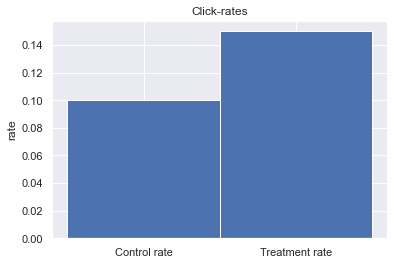

In [2]:
# Click-rates
control_rate = np.sum(control) / len(control)
treatment_rate = np.sum(treatment) / len(treatment)

# Rate difference
empirical_rate_diff = treatment_rate - control_rate

print(f'Control group:') 
print(f'sum: {np.sum(control)}; rate: {round(control_rate,3)}; standard deviation: {round(np.std(control),3)}')
print()
print(f'Test group:')
print(f'sum: {np.sum(treatment)}; rate: {round(treatment_rate,3)}; standard deviation: {round(np.std(treatment),3)}')
print()
print(f'Difference of rate is {empirical_rate_diff}')

# Barplot
sns.set()
fig, ax  = plt.subplots()
ax.bar([1, 2], [control_rate, treatment_rate], width=1,
       tick_label=['Control rate', 'Treatment rate'], align='center')
plt.title('Click-rates')
plt.ylabel('rate')
plt.show()

### 3. Set the experiment

We realize a **Permutation Test** in which we scramble the order of the arrays using the difference of both rates as the **Test statistic**. A ***permutation test*** is a good choice here because we can simulate the result of the experiment as if the redesign had no effect on the click-rate. The **p-value** is set at 0.05.

***Test statistic***: is a single statistic that we obtain from the observed and simulated data and used to run the experiment. Is the metric we use to measure the effects of the treatment.

***p-value***: is the probability of observing a test statistic equally or more extreme than the one you observed, given that the null hypothesis is true.

We define a `permutation_test` function in which we reorder ***n*** times the both arrays (using a concatenation between them) to avoid the effect of the redesing and returns new lists with new simulated datasets for control and treatment groups.
- `np.concatenate`: uses a tuple of arrays as input

In [3]:
# Permutation test function
def permutation_samples(data1, data2, size=1):
    """Generate a permutation sample from two data sets, calculate their replicates and return p-value"""

    # Concatenate the data sets: data
    concatenated_data = np.concatenate((data1, data2))

    # Get samples: list of lists with all permuted new data
    samples_data_1 = []
    samples_data_2 = []
    
    for sample in range(size):
        permuted_data = np.random.permutation(concatenated_data)
        samples_data_1.append(permuted_data[:len(data1)])
        samples_data_2.append(permuted_data[len(data2):])
        
    return samples_data_1, samples_data_2

We define our test statistic function, `rate_diff` that takes a tuple as an input

In [4]:
def rate_diff(permutated_tuple):
    
    # Define control and treatment
    control = permutated_tuple[0]
    treatment = permutated_tuple[1]
    
    # Click-rates
    control_rate = np.sum(control) / len(control)
    treatment_rate = np.sum(treatment) / len(treatment)

    # Rate difference
    rate_diff = treatment_rate - control_rate
    
    return rate_diff

We define a `permutation_replicates` function in which we give as input two lists of permutation samples and our test statistic and calculate it for every experiment.

In [5]:
def permutation_replicates(data1, data2, test_statistic):
    """Generate permutation replicates represented by the test statistic of interest for the experiment using
    permutation test function"""
    
    # Empty array: replicates
    replicates = []
    
    # Get replicates
    for exp in zip(data1, data2):
        replicates.append(test_statistic(exp))
        
    return replicates

We define a `get_p_value` function

In [6]:
def get_p_value(data1, data2, empirical_statistic):
    """Calculate p-value after a permutation experiment using the test statistic of interest"""
    
    # Get replicates
    replicates = permutation_replicates(data1, data2, rate_diff)
    
    # Calculate and return p-value
    p = np.sum(replicates >= empirical_statistic) / len(replicates)
    
    return p

### 4. Run the experiment and "get p-value"

In [7]:
# Permutation samples
control_samples, treatment_samples = permutation_samples(control, treatment, size=10000)

# Print p-value
p_value = get_p_value(control_samples, treatment_samples, empirical_rate_diff)
print(p_value)

0.0108


### 5. Conclusion

Our ***p-value*** is smaller than the treshold we set.

"***The redising of the advertisement improved its performance!***"